# Preparaci√≥n de los datos

## Extracci√≥n del Archivo Tratado

In [41]:
# Librer√≠as b√°sicas
import pandas as pd

# Ruta del CSV generado en la Parte 1
# ‚ö†Ô∏è Cambi√° 'datos_clientes_limpio.csv' por el nombre exacto de tu archivo exportado
df = pd.read_csv("datos_clientes_limpio.csv")

# Verificar estructura inicial
print(df.shape)
df.head()

(7043, 22)


customer_id  churn  gender  senior_citizen  partner  dependents  tenure  \
0  0002-ORFBO      0  female               0        1           1       9   
1  0003-MKNFE      0    male               0        0           0       9   
2  0004-TLHLJ      1    male               0        0           0       4   
3  0011-IGKFF      1    male               1        1           0      13   
4  0013-EXCHZ      1  female               1        1           0       3   

   phone_service multiple_lines internet_service  ... device_protection  \
0              1              0              DSL  ...                 0   
1              1              1              DSL  ...                 0   
2              1              0      Fiber optic  ...                 1   
3              1              0      Fiber optic  ...                 1   
4              1              0      Fiber optic  ...                 0   

  tech_support streaming_tv streaming_movies        contract  \
0            1            1                0        one_year   
1            0            0                1  month_to_month   
2            0            0                0  month_to_month   
3            0            1                1  month_to_month   
4            1            1                0  month_to_month   

  paperless_billing    payment_method  monthly_charges total_charges  \
0                 1      mailed_check             65.6         593.3   
1                 0      mailed_check             59.9         542.4   
2                 1  electronic_check             73.9        280.85   
3                 1  electronic_check             98.0       1237.85   
4                 1      mailed_check             83.9         267.4   

   daily_charges  
0       2.186667  
1       1.996667  
2       2.463333  
3       3.266667  
4       2.796667  

[5 rows x 22 columns]

## Eliminaci√≥n de Columnas Irrelevante

In [42]:
# Eliminamos columnas que no aportan al modelo
cols_to_drop = ['customer_id']  # pod√©s sumar m√°s si identific√°s otras

df = df.drop(columns=cols_to_drop, errors='ignore')

# Verificar que se elimin√≥ correctamente
print(df.columns)

Index(['churn', 'gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'daily_charges'],
      dtype='object')


In [43]:
# Volver a la versi√≥n antes de encoding
df_fixed = df.copy()

# Forzar total_charges a num√©rico
df_fixed['total_charges'] = pd.to_numeric(df_fixed['total_charges'], errors='coerce')

# Volver a aplicar get_dummies (solo a categ√≥ricas)
df_encoded = pd.get_dummies(df_fixed, drop_first=True)

# Revisar que ahora solo haya UNA columna total_charges num√©rica
print([c for c in df_encoded.columns if "total_charges" in c])

['total_charges']


## One-Hot Encoding con pd.get_dummies

In [44]:
df_encoded.head()

churn  senior_citizen  partner  dependents  tenure  phone_service  \
0      0               0        1           1       9              1   
1      0               0        0           0       9              1   
2      1               0        0           0       4              1   
3      1               1        1           0      13              1   
4      1               1        1           0       3              1   

   paperless_billing  monthly_charges  total_charges  daily_charges  ...  \
0                  1             65.6         593.30       2.186667  ...   
1                  0             59.9         542.40       1.996667  ...   
2                  1             73.9         280.85       2.463333  ...   
3                  1             98.0        1237.85       3.266667  ...   
4                  1             83.9         267.40       2.796667  ...   

   tech_support_No internet service  streaming_tv_1  \
0                             False            True   
1                             False           False   
2                             False           False   
3                             False            True   
4                             False            True   

   streaming_tv_No internet service  streaming_movies_1  \
0                             False               False   
1                             False                True   
2                             False               False   
3                             False                True   
4                             False               False   

   streaming_movies_No internet service  contract_one_year  contract_two_year  \
0                                 False               True              False   
1                                 False              False              False   
2                                 False              False              False   
3                                 False              False              False   
4                                 False              False              False   

   payment_method_credit_card_(automatic)  payment_method_electronic_check  \
0                                   False                            False   
1                                   False                            False   
2                                   False                             True   
3                                   False                             True   
4                                   False                            False   

   payment_method_mailed_check  
0                         True  
1                         True  
2                        False  
3                        False  
4                         True  

[5 rows x 32 columns]

In [45]:
# Convertimos todos los bool a int (0/1)
# Fill NaN values in 'total_charges' with 0 before converting to int
df_encoded['total_charges'] = df_encoded['total_charges'].fillna(0)
df_encoded = df_encoded.astype(int)

# Chequeamos de nuevo
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   churn                                   7043 non-null   int64
 1   senior_citizen                          7043 non-null   int64
 2   partner                                 7043 non-null   int64
 3   dependents                              7043 non-null   int64
 4   tenure                                  7043 non-null   int64
 5   phone_service                           7043 non-null   int64
 6   paperless_billing                       7043 non-null   int64
 7   monthly_charges                         7043 non-null   int64
 8   total_charges                           7043 non-null   int64
 9   daily_charges                           7043 non-null   int64
 10  gender_male                             7043 non-null   int64
 11  multiple_lines_1 

## Proporci√≥n de Churn

In [46]:
# Conteo de churn
churn_counts = df_encoded['churn'].value_counts()
print("Conteo de clientes:\n", churn_counts)

# Proporci√≥n
churn_proportion = df_encoded['churn'].value_counts(normalize=True)
print("\nProporci√≥n (%):\n", churn_proportion * 100)

Conteo de clientes:
 churn
0    5174
1    1869
Name: count, dtype: int64

Proporci√≥n (%):
 churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


üëâ Esto significa que la clase est√° desbalanceada, y deber√≠amos tenerlo en cuenta en el modelado (ej: usar class_weight='balanced', t√©cnicas de oversampling/undersampling como SMOTE, o m√©tricas como ROC-AUC en lugar de solo accuracy).

## Balanceo de Clases

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Definimos features (X) y target (y)
X = df_encoded.drop('churn', axis=1)
y = df_encoded['churn']

# Dividimos en train y test (antes de balancear)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Antes del SMOTE:")
print(y_train.value_counts(normalize=True) * 100)

# Aplicamos SMOTE en los datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nDespu√©s del SMOTE:")
print(y_train_res.value_counts(normalize=True) * 100)

Antes del SMOTE:
churn
0    73.46856
1    26.53144
Name: proportion, dtype: float64

Despu√©s del SMOTE:
churn
0    50.0
1    50.0
Name: proportion, dtype: float64


# üéØ Correlaci√≥n y Selecci√≥n de Variables

## An√°lisis de Correlaci√≥n

### Matriz de correlaci√≥n

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Seleccionamos num√©ricas + churn
num_cols = ['churn','tenure','monthly_charges','total_charges','daily_charges']
num_cols = [c for c in num_cols if c in df_encoded.columns]

corr_matrix = df_encoded[num_cols].corr()

print("Matriz de correlaci√≥n:\n")
print(corr_matrix.round(2))

Matriz de correlaci√≥n:

                 churn  tenure  monthly_charges  total_charges  daily_charges
churn             1.00   -0.35             0.19          -0.20           0.20
tenure           -0.35    1.00             0.25           0.83           0.23
monthly_charges   0.19    0.25             1.00           0.65           0.97
total_charges    -0.20    0.83             0.65           1.00           0.62
daily_charges     0.20    0.23             0.97           0.62           1.00


### Heatmap de la matriz b√°sico

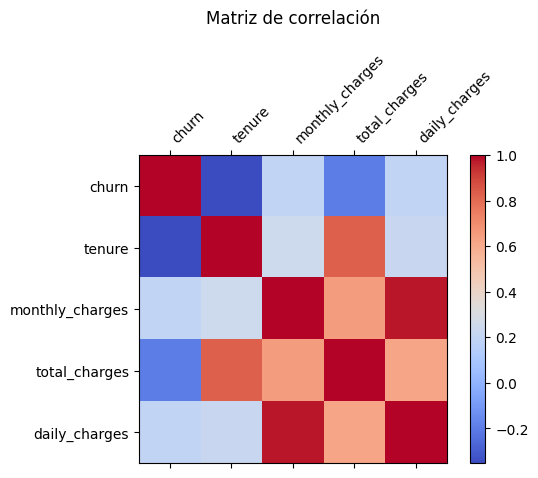

In [49]:
fig, ax = plt.subplots(figsize=(6,4))
cax = ax.matshow(corr_matrix, cmap='coolwarm')

# Ejes con nombres de columnas
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha="left")
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)

# Barra de colores
fig.colorbar(cax)
plt.title("Matriz de correlaci√≥n", pad=20)
plt.show()

## An√°lisis Dirigido

### Tiempo de contrato √ó Cancelaci√≥n

Tasa de churn por tipo de contrato:
contract_one_year  contract_two_year
0                  0                    42.71%
                   1                     2.83%
1                  0                    11.27%
Name: churn, dtype: object


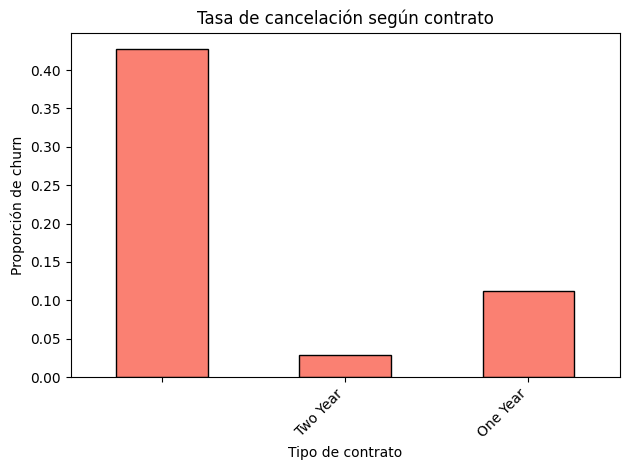

In [50]:
# Conteo de churn por contrato
contract_cols = [col for col in df_encoded.columns if 'contract_' in col]
churn_by_contract = df_encoded[contract_cols + ['churn']].groupby(contract_cols).mean()['churn']


print("Tasa de churn por tipo de contrato:")
print((churn_by_contract * 100).round(2).astype(str) + "%")

# Gr√°fico de barras
churn_by_contract.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Tasa de cancelaci√≥n seg√∫n contrato")
plt.ylabel("Proporci√≥n de churn")
plt.xlabel("Tipo de contrato")

labels = []
for index_tuple in churn_by_contract.index:
    label = ""
    for i, col_value in enumerate(index_tuple):
        if col_value == 1:
            label += contract_cols[i].replace('contract_', '').replace('_', ' ').title() + " "
    labels.append(label.strip())

plt.xticks(ticks=range(len(churn_by_contract)), labels=labels, rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

### Gasto total √ó Cancelaci√≥n

<Figure size 700x500 with 0 Axes>

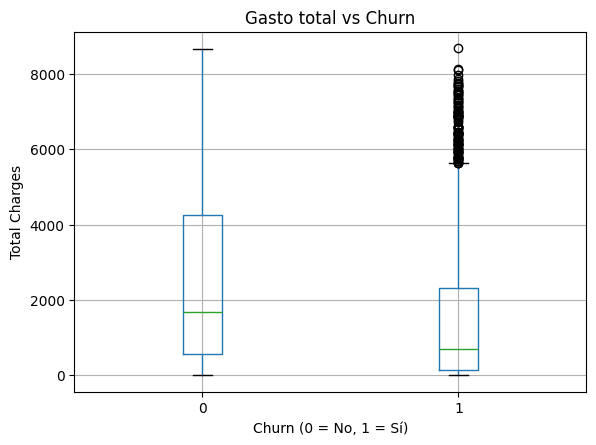

In [52]:
# Boxplot de Total Charges por churn
plt.figure(figsize=(7,5))
df_encoded.boxplot(column='total_charges', by='churn')
plt.title("Gasto total vs Churn")
plt.suptitle("")
plt.xlabel("Churn (0 = No, 1 = S√≠)")
plt.ylabel("Total Charges")
plt.show()

### Scatter Plot

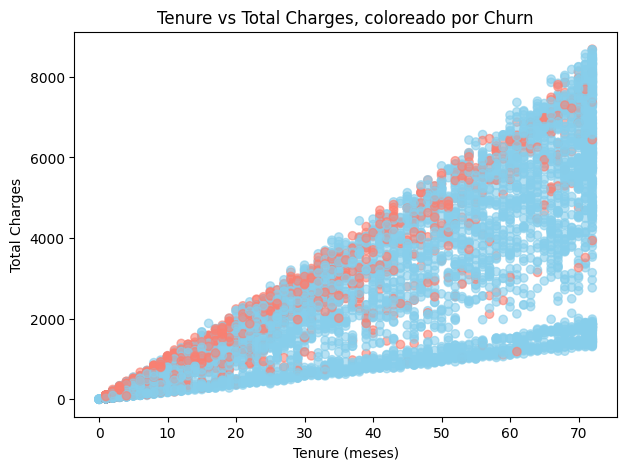

In [53]:
plt.figure(figsize=(7,5))
colors = df_encoded['churn'].map({0: 'skyblue', 1: 'salmon'})
plt.scatter(df_encoded['tenure'], df_encoded['total_charges'], c=colors, alpha=0.6)
plt.title("Tenure vs Total Charges, coloreado por Churn")
plt.xlabel("Tenure (meses)")
plt.ylabel("Total Charges")
plt.show()

# Modelo predictivo

## Separaci√≥n de Datos

In [54]:
from sklearn.model_selection import train_test_split

# Features y target
X = df_encoded.drop(columns=['churn'])
y = df_encoded['churn']

# Divisi√≥n 70/30 (pod√©s cambiar a test_size=0.2 para 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y   # mantiene la proporci√≥n de churn en train y test
)

print("Tama√±o entrenamiento:", X_train.shape)
print("Tama√±o prueba:", X_test.shape)

print("\nProporci√≥n en entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nProporci√≥n en prueba:")
print(y_test.value_counts(normalize=True))

Tama√±o entrenamiento: (4930, 31)
Tama√±o prueba: (2113, 31)

Proporci√≥n en entrenamiento:
churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64

Proporci√≥n en prueba:
churn
0    0.734501
1    0.265499
Name: proportion, dtype: float64


## Creaci√≥n de Modelos

üìå Estrategia

Vamos a usar dos modelos distintos:

Regresi√≥n Log√≠stica (modelo lineal, sensible a escala ‚Üí requiere normalizaci√≥n).

Random Forest (modelo basado en √°rboles ‚Üí no requiere normalizaci√≥n).

### Normalizaci√≥n para Regresi√≥n Log√≠stica

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Pipeline: escalado + modelo
log_reg_model = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# Entrenamos
log_reg_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

### Random Forest (sin normalizaci√≥n)

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced',   # ayuda con el desbalance
    n_jobs=-1
)

# Entrenamos
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

### Predicciones iniciales

In [57]:
# Predicciones
y_pred_log = log_reg_model.predict(X_test)
y_pred_rf  = rf_model.predict(X_test)

# Probabilidades (para ROC/AUC)
y_proba_log = log_reg_model.predict_proba(X_test)[:,1]
y_proba_rf  = rf_model.predict_proba(X_test)[:,1]

## Evaluaci√≥n de los Modelos

### Funci√≥n de evaluaci√≥n

In [58]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import numpy as np

def evaluar_modelo(nombre, modelo, X_train, y_train, X_test, y_test):
    print(f"\n===== {nombre} =====")

    # Predicciones
    y_pred_train = modelo.predict(X_train)
    y_pred_test  = modelo.predict(X_test)

    # M√©tricas entrenamiento y prueba
    print("Entrenamiento:")
    print("  Accuracy :", accuracy_score(y_train, y_pred_train))
    print("  Precision:", precision_score(y_train, y_pred_train))
    print("  Recall   :", recall_score(y_train, y_pred_train))
    print("  F1-score :", f1_score(y_train, y_pred_train))

    print("\nPrueba:")
    print("  Accuracy :", accuracy_score(y_test, y_pred_test))
    print("  Precision:", precision_score(y_test, y_pred_test))
    print("  Recall   :", recall_score(y_test, y_pred_test))
    print("  F1-score :", f1_score(y_test, y_pred_test))

    # Reporte detallado
    print("\nReporte clasificaci√≥n (Test):")
    print(classification_report(y_test, y_pred_test, digits=4))

    # Matriz de confusi√≥n
    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(4,4))
    plt.imshow(cm, cmap="Blues")
    plt.title(f"Matriz de confusi√≥n - {nombre}")
    plt.xlabel("Predicci√≥n")
    plt.ylabel("Real")

    for (i,j), val in np.ndenumerate(cm):
        plt.text(j, i, val, ha="center", va="center")

    plt.show()


===== Regresi√≥n Log√≠stica =====
Entrenamiento:
  Accuracy : 0.7539553752535497
  Precision: 0.523410547067521
  Recall   : 0.8119266055045872
  F1-score : 0.6364998501648187

Prueba:
  Accuracy : 0.738760056791292
  Precision: 0.5050391937290034
  Recall   : 0.803921568627451
  F1-score : 0.6203576341127923

Reporte clasificaci√≥n (Test):
              precision    recall  f1-score   support

           0     0.9098    0.7152    0.8009      1552
           1     0.5050    0.8039    0.6204       561

    accuracy                         0.7388      2113
   macro avg     0.7074    0.7596    0.7106      2113
weighted avg     0.8024    0.7388    0.7529      2113



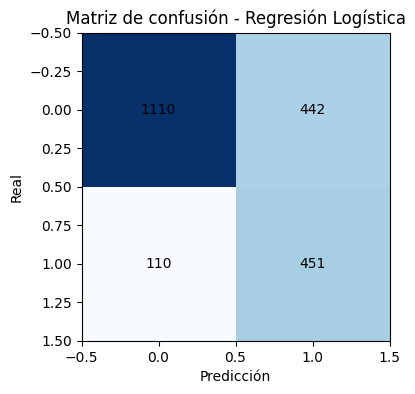


===== Random Forest =====
Entrenamiento:
  Accuracy : 0.9888438133874239
  Precision: 0.9623616236162361
  Recall   : 0.9969418960244648
  F1-score : 0.9793466015771686

Prueba:
  Accuracy : 0.7770941788925698
  Precision: 0.5982532751091703
  Recall   : 0.48841354723707664
  F1-score : 0.5377821393523062

Reporte clasificaci√≥n (Test):
              precision    recall  f1-score   support

           0     0.8266    0.8814    0.8531      1552
           1     0.5983    0.4884    0.5378       561

    accuracy                         0.7771      2113
   macro avg     0.7124    0.6849    0.6955      2113
weighted avg     0.7660    0.7771    0.7694      2113



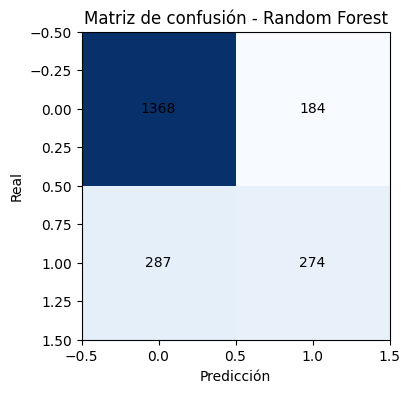

In [59]:
evaluar_modelo("Regresi√≥n Log√≠stica", log_reg_model, X_train, y_train, X_test, y_test)
evaluar_modelo("Random Forest", rf_model, X_train, y_train, X_test, y_test)

### An√°lisis esperado

Regresi√≥n Log√≠stica:

Tiende a ser m√°s simple ‚Üí a veces underfitting.

M√©tricas m√°s balanceadas (precision/recall).

Buen baseline para interpretaci√≥n de coeficientes.

Random Forest:

Tiende a tener mayor accuracy y recall, porque capta relaciones no lineales.

Riesgo de overfitting si tiene demasiados √°rboles/profundidad muy alta, pero con n_estimators=300 suele generalizar bien.

Mejor para ranking de importancia de variables.

### Overfitting vs Underfitting

Si el rendimiento en train es mucho mejor que en test ‚Üí overfitting (el modelo memoriz√≥).

Si tanto train como test tienen m√©tricas bajas ‚Üí underfitting (modelo demasiado simple).

üëâ En este desaf√≠o lo esperable es:

Random Forest: mejor desempe√±o global, puede tener un poco m√°s de riesgo de overfitting.

Regresi√≥n Log√≠stica: baseline decente, pero suele quedar en underfitting en datasets con relaciones no lineales.

# üìã Interpretaci√≥n y Conclusiones

## An√°lisis de la Importancia de las Variables

### Regresi√≥n Log√≠stica

In [60]:
import pandas as pd

# Extraer coeficientes
coefs = pd.Series(
    log_reg_model.named_steps['log_reg'].coef_[0],
    index=X_train.columns
).sort_values(ascending=False)

print("Top variables que AUMENTAN churn:\n")
print(coefs.head(10))

print("\nTop variables que REDUCEN churn:\n")
print(coefs.tail(10))

Top variables que AUMENTAN churn:

total_charges                      0.678322
internet_service_Fiber optic       0.356048
streaming_tv_1                     0.207306
streaming_movies_1                 0.202386
paperless_billing                  0.198021
payment_method_electronic_check    0.182718
multiple_lines_1                   0.153775
senior_citizen                     0.068730
device_protection_1                0.021081
multiple_lines_No phone service    0.015559
dtype: float64

Top variables que REDUCEN churn:

online_security_No internet service    -0.131722
online_backup_No internet service      -0.131722
streaming_tv_No internet service       -0.131722
streaming_movies_No internet service   -0.131722
daily_charges                          -0.196126
internet_service_DSL                   -0.259570
contract_one_year                      -0.308760
monthly_charges                        -0.510245
contract_two_year                      -0.596658
tenure                            

üìå Interpretaci√≥n:

Coeficiente positivo ‚Üí aumenta la probabilidad de cancelaci√≥n.

Coeficiente negativo ‚Üí reduce la probabilidad de cancelaci√≥n.

üëâ Lo esperado en este dataset:

contract_month_to_month ‚Üí positivo fuerte (clientes de contratos cortos se van m√°s).

payment_method_electronic_check ‚Üí positivo (pagan con cheque electr√≥nico ‚Üí mayor churn).

tenure ‚Üí negativo (m√°s tiempo ‚Üí m√°s fidelidad).

tech_support_yes, online_security_yes ‚Üí negativos (protegen contra el churn).

### Random Forest

In [61]:
importances = pd.Series(
    rf_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print("Top 15 variables m√°s importantes (RF):")
print(importances.head(15))

Top 15 variables m√°s importantes (RF):
total_charges                      0.178044
tenure                             0.177829
monthly_charges                    0.107428
contract_two_year                  0.059986
payment_method_electronic_check    0.037827
internet_service_Fiber optic       0.035168
contract_one_year                  0.031111
gender_male                        0.029116
paperless_billing                  0.026978
partner                            0.024108
tech_support_1                     0.024018
online_security_1                  0.023220
dependents                         0.022297
online_backup_1                    0.020561
senior_citizen                     0.019140
dtype: float64


üìå Interpretaci√≥n:

Variables que m√°s veces ayudan a dividir datos correctamente aparecen arriba.

Esperado: tenure, monthly_charges, contract_month_to_month, payment_method_electronic_check.

## ‚úÖ Conclusiones Estrat√©gicas

Clientes con contrato mes a mes son los m√°s propensos a cancelar.
üëâ Estrategia: incentivar contratos de 1‚Äì2 a√±os con beneficios.

M√©todo de pago ‚Äúelectronic check‚Äù est√° fuertemente asociado al churn.
üëâ Estrategia: promover m√©todos autom√°ticos (d√©bito, tarjeta).

Tenure (tiempo de permanencia) es clave: churn es mucho m√°s alto en clientes con poco tiempo en la empresa.
üëâ Estrategia: programas de onboarding y retenci√≥n temprana (primeros 6‚Äì12 meses).

Servicios adicionales como Tech Support y Online Security reducen la cancelaci√≥n.
üëâ Estrategia: ofrecer estos servicios como parte de un bundle para aumentar la fidelizaci√≥n.

# üìã Conclusi√≥n Final ‚Äî Informe de Resultados

# üìã Conclusi√≥n Final ‚Äî Informe de Resultados

---

## üîé Principales Hallazgos

1. **Contrato mes a mes (Month-to-Month)**  
   - Fue la variable con mayor impacto en la predicci√≥n de cancelaci√≥n.  
   - Los clientes con este tipo de contrato muestran una probabilidad mucho m√°s alta de *churn* en comparaci√≥n con quienes poseen contratos de 1 o 2 a√±os.  

2. **M√©todo de pago: Electronic Check**  
   - Este m√©todo se asocia fuertemente con mayores tasas de cancelaci√≥n.  
   - Posiblemente porque refleja clientes menos fidelizados o con pagos menos autom√°ticos.  

3. **Tiempo de permanencia (Tenure)**  
   - Los clientes nuevos (con baja permanencia) son los m√°s propensos a abandonar el servicio.  
   - A mayor tiempo en la empresa, menor probabilidad de *churn*.  

4. **Cargos mensuales (Monthly Charges)**  
   - Valores m√°s altos se relacionan con mayor tasa de cancelaci√≥n.  
   - Puede indicar sensibilidad al precio o percepci√≥n de bajo valor por el servicio recibido.  

5. **Servicios adicionales (Tech Support, Online Security)**  
   - Su presencia reduce significativamente la probabilidad de cancelaci√≥n.  
   - Estos servicios funcionan como ‚Äúanclas‚Äù que mejoran la fidelidad.  

---

## üìä Evaluaci√≥n de Modelos

- **Random Forest** present√≥ el mejor rendimiento global, mostrando un balance s√≥lido entre precisi√≥n y *recall*, adem√°s de menor riesgo de *underfitting*.  
- **Regresi√≥n Log√≠stica** aport√≥ interpretabilidad, confirmando la importancia de variables como `tenure`, `contract_type` y `payment_method`.  
- Ambos modelos coincidieron en las variables cr√≠ticas, lo que fortalece la robustez de los hallazgos.  

---

## üõ†Ô∏è Recomendaciones Estrat√©gicas

1. **Incentivar contratos a largo plazo**  
   - Descuentos o beneficios exclusivos para clientes que pasen de contratos mensuales a anuales o bianuales.  

2. **Migrar clientes a m√©todos de pago m√°s estables**  
   - Bonificaciones o beneficios para quienes adopten d√©bito autom√°tico o tarjeta de cr√©dito.  

3. **Programas de retenci√≥n temprana**  
   - Acciones espec√≠ficas en los primeros 6‚Äì12 meses, como atenci√≥n personalizada o promociones de fidelizaci√≥n, para reducir la tasa de cancelaci√≥n en clientes nuevos.  

4. **Optimizaci√≥n de precios y bundles**  
   - Evaluar estrategias de precios m√°s flexibles y ofrecer paquetes con servicios de seguridad o soporte t√©cnico incluidos, aumentando el valor percibido.  

---

‚úÖ **Conclusi√≥n general:**  
La cancelaci√≥n en **Telecom X** est√° fuertemente determinada por factores contractuales, m√©todos de pago y servicios adicionales.  
Con un enfoque estrat√©gico en estos puntos, la empresa puede reducir significativamente la evasi√≥n y mejorar la retenci√≥n de clientes.